#Step 1: Import Data

##1.1 Import packages


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
import pandas as pd
import numpy as np
import gc #Garbage Collector to free up memory
gc.enable

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

1.2 Load Data

In [ ]:
aisles = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/aisles.csv'))

In [ ]:
departments = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/departments.csv'))

In [ ]:
order_products__prior = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/order_products__prior.csv'))

In [ ]:
order_products__train = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/order_products__train.csv'))

In [ ]:
orders = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/orders.csv'))

In [ ]:
products = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/products.csv'))

In [ ]:
#print the shape of each dataset
print(orders.shape)
print(order_products__prior.shape)
print(order_products__train.shape)
print(products.shape)
print(departments.shape)
print(aisles.shape)

In [ ]:
# Info of each dataset
aisles.info()
departments.info()
order_products__prior.info()
order_products__train.info()
orders.info()
departments.info()

In [ ]:
#Print a list of the unique departments 
print(list(departments.department.unique()))

In [ ]:
#Print a list of the unique aisles
[print(list(aisles.aisle.unique()))]

In [ ]:
#Count of the number of products in each department
products.department_id.value_counts()

#Step 2: EDA

In [ ]:
#create prior, train and test datasets by filtering orders dataset by eval_set
prior = orders[orders['eval_set'] == 'prior']
train = orders[orders['eval_set'] == 'train']
test = orders[orders['eval_set'] == 'test']

In [ ]:
#add all features into prior dataset
prior_order = pd.merge(prior,order_products__prior)
prior_products = pd.merge(prior_order, products)
prior_aisle = pd.merge(prior_products, aisles)
prior_full = pd.merge(prior_aisle,departments)

In [ ]:
#add all features into train dataset
train_order = pd.merge(train,order_products__train)
train_products = pd.merge(train_order, products)
train_aisle = pd.merge(train_products, aisles)
train_full = pd.merge(train_aisle,departments)

In [ ]:
#Due to the number of instances, reduce the prior data
prior_order2 = prior_order.sample(frac=0.20, random_state=1)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
rcParams['figure.figsize'] = 12, 4
sb.set_style('whitegrid')

Text(0.5, 1.0, 'Missing Values')

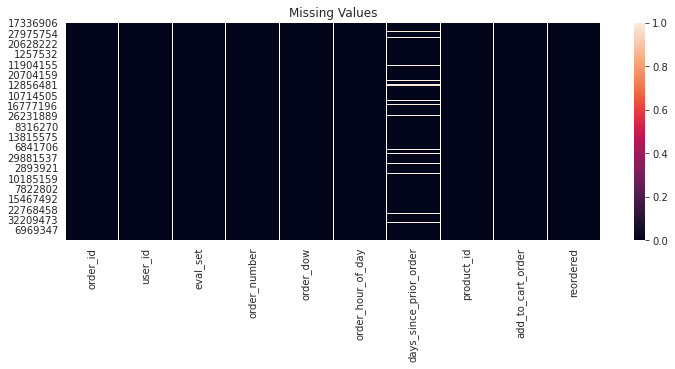

In [ ]:
#Check to see if there are null values
sb.heatmap(prior_order2.isnull(), cbar=True)
plt.title("Missing Values")
#Null values in days_since_prior_order

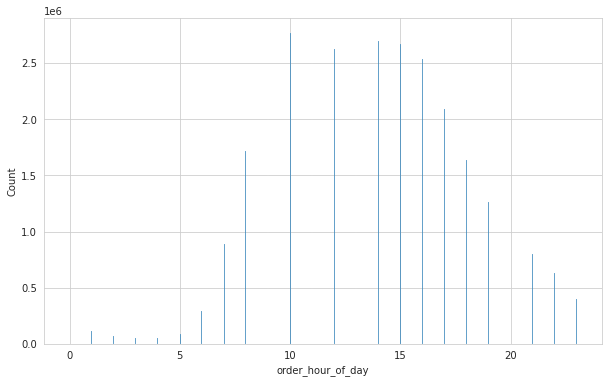

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(x='order_hour_of_day',data=prior_full)

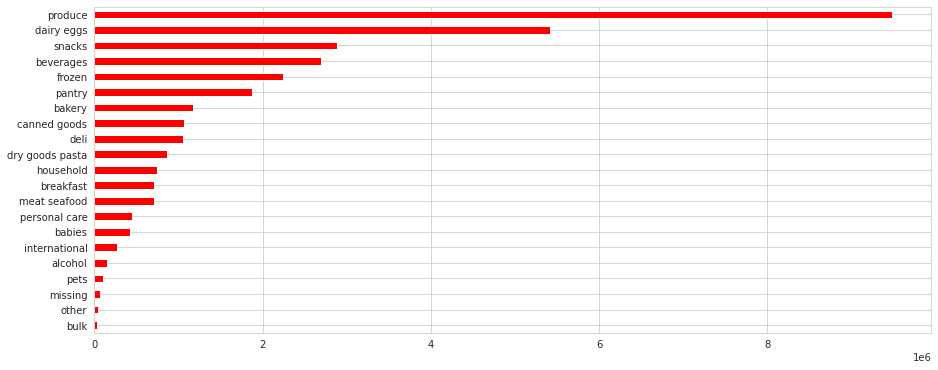

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

prior_full['department'].value_counts().sort_values(ascending=True).plot(kind='barh',color='red')

There are 35955271 words in the combination of all Product Name.


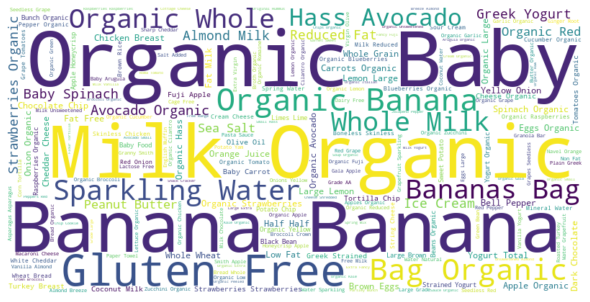

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator

import matplotlib.pyplot as plt

#making of word cloud from Product name column
text = " ".join(topic for topic in train_full.product_name.astype(str))
print ("There are {} words in the combination of all Product Name.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#We can see that Banana is most popular followed by organic products

Text(0.5, 1.0, 'Prior Reordered')

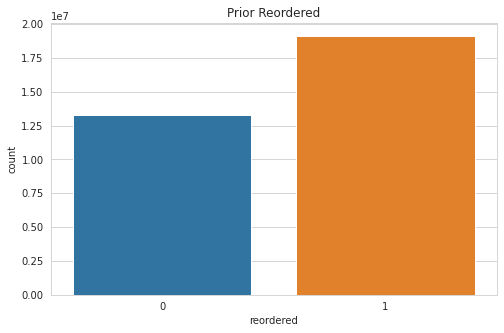

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x='reordered',data=prior_full)
plt.title("Prior Reordered")

In [ ]:
#percentage of re-orders in prior set #
prior_full.reordered.sum() / prior_full.shape[0]

0.5896974667922161

Text(0.5, 1.0, 'Train Reordered')

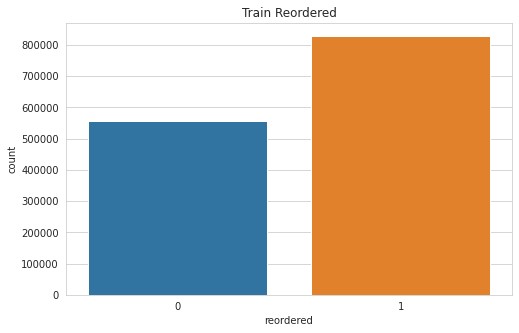

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x='reordered',data=train_full)
plt.title("Train Reordered")

In [ ]:
#percentage of re-orders in train set #
train_full.reordered.sum() / train_full.shape[0]

0.5985944127509629